<a href="https://colab.research.google.com/github/mushamvineeth/Vineeth_INFO5731_Spring2021/blob/main/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [ ]:
import pandas as pd
data = pd.read_csv("/content/reviwes.csv")

In [ ]:
!pip install stop_words

In [ ]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
tokenizer = RegexpTokenizer(r'\w+')
en_st = get_stop_words('en')
p_stemmer_ = PorterStemmer()

In [ ]:
data['Lower Case'] = data['Cleaned_review'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
data['Tokenization'] = data['Lower Case'].apply(lambda x: tokenizer.tokenize(x))
data['Tokens'] = data['Tokenization'].apply(lambda x: [i for i in x if not i in en_st])
data['Stemming'] = data['Tokens'].apply(lambda x: [p_stemmer_.stem(i) for i in x])

In [ ]:
texts = []
for line in data['Stemming']:
  texts.append(line)

In [ ]:

#Bigrams and Trigrams

from gensim import corpora, models
bigram = models.Phrases(texts, min_count=5, threshold=100)
trigram = models.Phrases(bigram[texts], threshold=100)
bigram_mod = models.phrases.Phraser(bigram)
trigram_mod = models.phrases.Phraser(trigram)
print(trigram_mod[bigram_mod[texts[0]]])

['everi', 'movi', 'come', 'truli', 'make', 'impact', 'joaquin', 's', 'perform', 'scenographi', 's', 'brillianc', 'grotesqu', 'haunt', 'cringi', 'hard', 'watch', 'time', 'mesmer', 'won', 't', 'blink', 'eye', 'watch', 'tragic', 'serious', 'funni', 'moment', 'emot', 'rollercoast', 'sometim', 'multipl', 'emot', 'pop', 'time', 'far', 'typic', 'action', 'riddl', 'predict', 'super', 'hero', 'movi', 's', 'proper', 'psycholog', 'thriller', 'drama', 'singl', 'best', 'charact', 'develop', 'ever', 'seen']


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
def make_bi_grams(text_):
    return [bi_gram_mod[doc] for doc in text_]
  
def make_tri_grams(text_):
    return [trigram_mod[bigram_mod[doc]] for doc in text_]

def lemmatization(text_, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    text_out = []
    for sent in text_:
        doc = nlp(" ".join(sent)) 
        text_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return text_out

In [ ]:
import spacy
data_words_bi_grams = make_bi_grams(texts)
nlp = spacy.load('en', disable=['parser', 'ner'])
data_lemmatized_ = lemmatization(data_words_bi_grams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized_[:1])

[['come', 'truli', 'make', 'impact', 'win', 'blink', 'eye', 'watch', 'tragic', 'serious', 'moment', 'pop', 'time', 'far', 'typic', 'predict', 'super', 'hero', 'proper', 'psycholog', 'drama', 'good', 'charact', 'develop', 'ever', 'see']]


In [ ]:
id2word = corpora.Dictionary(data_lemmatized_)
text_ = data_lemmatized_
corpus = [id2word.doc2bow(text) for text in text_]
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1)]]


In [ ]:
#
id2word = corpora.Dictionary(data_lemmatized_)
texts = data_lemmatized_
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1)]]


In [ ]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('blink', 1),
  ('charact', 1),
  ('come', 1),
  ('develop', 1),
  ('drama', 1),
  ('ever', 1),
  ('eye', 1),
  ('far', 1),
  ('good', 1),
  ('hero', 1),
  ('impact', 1),
  ('make', 1),
  ('moment', 1),
  ('pop', 1),
  ('predict', 1),
  ('proper', 1),
  ('psycholog', 1),
  ('see', 1),
  ('serious', 1),
  ('super', 1),
  ('time', 1),
  ('tragic', 1),
  ('truli', 1),
  ('typic', 1),
  ('watch', 1),
  ('win', 1)]]

In [ ]:
lda_model = models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics = 10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:

#LDA
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.010*"present" + 0.009*"ledger" + 0.007*"endgam" + 0.007*"heath" + '
  '0.007*"storylin" + 0.007*"troubl" + 0.004*"main" + 0.004*"cinemat" + '
  '0.004*"doubt" + 0.004*"earth"'),
 (1,
  '0.038*"incre" + 0.036*"hit" + 0.035*"produc" + 0.035*"look" + 0.034*"cut" + '
  '0.034*"want" + 0.034*"will" + 0.034*"long" + 0.033*"moment" + '
  '0.033*"wrong"'),
 (2,
  '0.011*"score" + 0.009*"need" + 0.008*"boy" + 0.007*"drive" + '
  '0.007*"director" + 0.007*"driver" + 0.006*"taxi" + 0.005*"visual" + '
  '0.005*"writer" + 0.005*"nice"'),
 (3,
  '0.033*"movi" + 0.027*"film" + 0.021*"see" + 0.019*"just" + 0.017*"actual" + '
  '0.016*"can" + 0.015*"good" + 0.014*"make" + 0.013*"hype" + 0.013*"screen"'),
 (4,
  '0.015*"take" + 0.014*"will" + 0.011*"book" + 0.010*"money" + 0.008*"move" + '
  '0.007*"deep" + 0.006*"need" + 0.006*"life" + 0.006*"origin" + '
  '0.006*"network"'),
 (5,
  '0.059*"movi" + 0.040*"end" + 0.037*"good" + 0.034*"could" + 0.034*"scene" + '
  '0.020*"fall" + 0.020*"actor" 

In [ ]:
#LSA
model_lsa = models.LsiModel(corpus, num_topics = 10, id2word = id2word)
pprint(model_lsa.print_topics(num_topics = 10))

[(0,
  '0.495*"movi" + 0.216*"make" + 0.210*"good" + 0.204*"just" + 0.198*"see" + '
  '0.181*"film" + 0.174*"feel" + 0.172*"can" + 0.152*"say" + 0.135*"even"'),
 (1,
  '0.427*"movi" + -0.411*"film" + -0.263*"will" + 0.217*"just" + -0.184*"play" '
  '+ -0.179*"make" + -0.156*"thing" + -0.133*"say" + 0.123*"perform" + '
  '-0.116*"show"'),
 (2,
  '0.446*"just" + -0.372*"movi" + 0.213*"even" + -0.184*"peopl" + 0.168*"go" + '
  '0.139*"look" + 0.130*"joker" + 0.125*"charact" + 0.124*"watch" + '
  '-0.123*"stori"'),
 (3,
  '-0.316*"just" + 0.242*"go" + -0.225*"good" + -0.217*"watch" + -0.192*"film" '
  '+ 0.188*"movi" + -0.188*"feel" + 0.184*"will" + 0.162*"joker" + '
  '-0.140*"time"'),
 (4,
  '-0.241*"also" + -0.239*"peopl" + 0.196*"see" + -0.186*"actual" + '
  '-0.176*"make" + 0.170*"perform" + -0.164*"ill" + -0.162*"say" + 0.154*"may" '
  '+ -0.149*"thing"'),
 (5,
  '-0.324*"film" + 0.247*"can" + -0.191*"much" + 0.185*"thing" + '
  '-0.166*"peopl" + 0.165*"great" + 0.163*"make" + -0.138

In [ ]:
from gensim.models import CoherenceModel
print('\nPerplexity: ', lda_model.log_perplexity(corpus))
coherence_model_lda_ = CoherenceModel(model=lda_model, texts=data_lemmatized_, dictionary=id2word, coherence='c_v')
coherence_lda_ = coherence_model_lda_.get_coherence()
print('\nCoherence Score: ', coherence_lda_)


Perplexity:  -7.103385431519246

Coherence Score:  0.4336243744415018


# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

Positive    42
Negative    37
Neutral     23
Netural      4
Name: sentiment, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


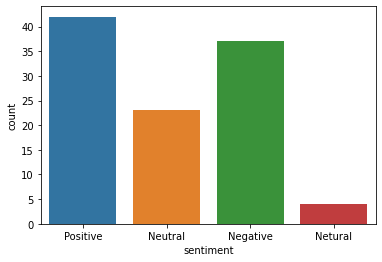

In [ ]:
# Write your code here

# Write your code here
import seaborn as sns
print(data['sentiment'].value_counts())
sns.countplot(data['sentiment'])



In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
from textblob import TextBlob
data['Cleaned_review'] = data['Cleaned_review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['Cleaned_review'] = data['Cleaned_review'].str.replace('[^\w\s]','')
s = stopwords.words('english')
data['Cleaned_review'] = data['Cleaned_review'].apply(lambda x: " ".join(x for x in x.split() if x not in s))


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
Tf_idf_vector = TfidfVectorizer(ngram_range=(1,2), max_features=1000)
Tf_idf_vector.fit(data['Cleaned_review'])
x_values_ = Tf_idf_vector.transform(data['Cleaned_review'])
encoder_ = LabelEncoder()
y_values_ = encoder_.fit_transform(data['sentiment'])

In [ ]:

from sklearn import model_selection
X_train, x_test, y_train, y_test = model_selection.train_test_split(x_values_, y_values_, test_size=0.2)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import naive_bayes
N_B = naive_bayes.MultinomialNB()
N_B.fit(X_train, y_train)
predicted_nb_ = n_b.predict(x_test)
print("Accuracy score is {0}".format(accuracy_score(y_test, predicted_nb_)))
Report_nb_ = classification_report(y_test, predicted_nb_, output_dict=True)
Report_nb_

Accuracy score is 0.36363636363636365


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'0': {'f1-score': 0.37499999999999994,
  'precision': 0.5,
  'recall': 0.3,
  'support': 10},
 '1': {'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0, 'support': 1},
 '2': {'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0, 'support': 6},
 '3': {'f1-score': 0.47619047619047616,
  'precision': 0.3125,
  'recall': 1.0,
  'support': 5},
 'accuracy': 0.36363636363636365,
 'macro avg': {'f1-score': 0.212797619047619,
  'precision': 0.203125,
  'recall': 0.325,
  'support': 22},
 'weighted avg': {'f1-score': 0.27867965367965364,
  'precision': 0.29829545454545453,
  'recall': 0.36363636363636365,
  'support': 22}}

In [ ]:
from sklearn import svm
svm_model_ = svm.SVC(kernel='linear')
svm_model_.fit(X_train, y_train)
predicted_model = svm_model_.predict(x_test)
print("Accuracy score is {0}".format(accuracy_score(y_test, predicted_model)))
Report_ = classification_report(y_test, predicted_model, output_dict=True)
Report_

Accuracy score is 0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'0': {'f1-score': 0.631578947368421,
  'precision': 0.6666666666666666,
  'recall': 0.6,
  'support': 10},
 '1': {'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0, 'support': 1},
 '2': {'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0, 'support': 6},
 '3': {'f1-score': 0.5555555555555556,
  'precision': 0.38461538461538464,
  'recall': 1.0,
  'support': 5},
 'accuracy': 0.5,
 'macro avg': {'f1-score': 0.29678362573099415,
  'precision': 0.26282051282051283,
  'recall': 0.4,
  'support': 22},
 'weighted avg': {'f1-score': 0.4133439659755449,
  'precision': 0.39044289044289043,
  'recall': 0.5,
  'support': 22}}

# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/info5731_spring2021/blob/main/assignment/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [ ]:
# Write your code here

import csv
import pandas as pd

train_data_ = pd.read_csv("/content/train.csv")
test_data_ = pd.read_csv("/content/test.csv")

In [ ]:
df = pd.read_csv("train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [ ]:
print(train_data_.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [ ]:
print(test_data_.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


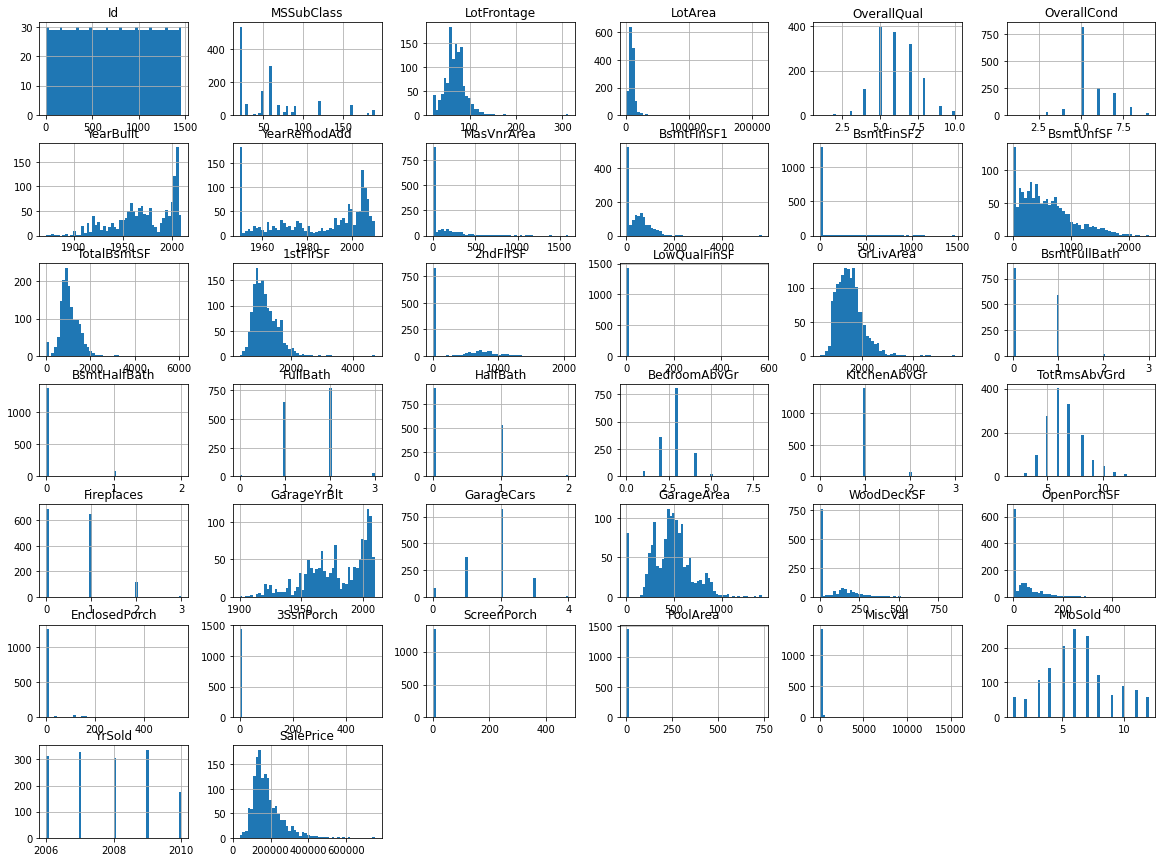

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
train_data_.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [ ]:
corr_matrix_ = train_data_.corr()
corr_matrix_["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

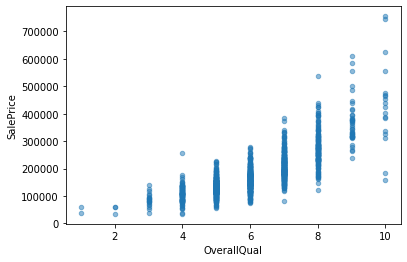

In [ ]:
train_data_.plot(kind="scatter", x="OverallQual", y="SalePrice", alpha=0.5)

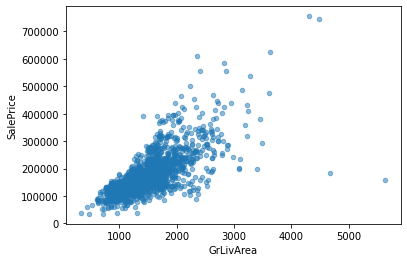

In [ ]:
train_data_.plot(kind="scatter", x="GrLivArea", y="SalePrice", alpha=0.5)

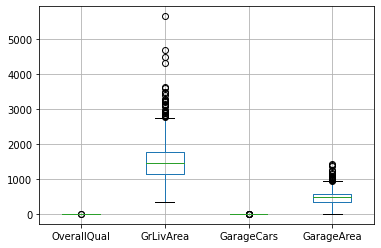

In [ ]:
train_data_.boxplot(column=['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'])

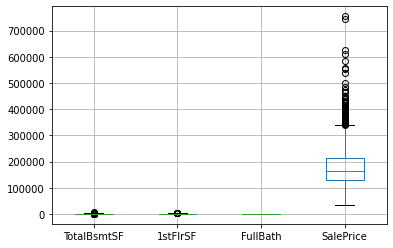

In [ ]:
train_data_.boxplot(column=['TotalBsmtSF', '1stFlrSF', 'FullBath', 'SalePrice'])

In [ ]:
train_data_.fillna(train_data_.mean(), inplace = True)
test_data_.fillna(test_data_.mean(), inplace = True)
print(train_data_.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [ ]:
print(test_data_.isnull().sum())

Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 80, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
col_ = ('GarageCond', 'LandContour', 'RoofStyle', 'RoofMatl', 'Heating', 'MiscFeature', 'SaleType', 'GarageType', 'Electrical', 'SaleCondition', 'Foundation', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'FireplaceQu', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'Utilities', 'BldgType', 'HouseStyle','PoolQC', 'BsmtQual', 'BsmtCond', 'GarageQual','BsmtExposure', 'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1','BsmtFinType2', 'Functional', 'Fence', 'GarageFinish', 'LandSlope','LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold', 'MSZoning')
for c in col_:
    encoder_ = LabelEncoder()
    encoder_.fit(list(train_data_[c].values))
    train_data_[c] = encoder_.transform(list(train_data_[c].values))

In [ ]:
for c in col_:
    encoder_test_ = LabelEncoder()
    encoder_test_.fit(list(test_data_[c].values))
    test_data_[c] = encoder_test_.transform(list(test_data_[c].values))

In [ ]:
x_values_ = train_data_[train_data_.columns[:80]] 
x_test_values = test_data_[test_data_.columns[:80]]
y_values = train_data_['SalePrice']

In [ ]:
from sklearn.linear_model import LinearRegression
reg_model_ = LinearRegression()
reg_model_.fit(x_values_, y_values)
reg_model_.score(x_values_, y_values)

0.8548395143943592

In [ ]:
predicted_ = reg_model_.predict(x_test_values)
pd.DataFrame({'Predicted House Price': predicted_})

,Predicted House Price
0,184936.609022
1,239791.092108
2,245071.890618
3,263617.412688
4,263185.252850
...,...
1454,152148.218848
1455,138020.527442
1456,225624.228917
1457,196336.422912
